<a href="https://colab.research.google.com/github/19PA1A0465/Mini_-Project_2_Abnormal_EEG/blob/main/miniproject_base_model_for_review_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
 #importing all the required packages
import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn import metrics # for calculation of accuracy and precision
from sklearn.metrics import confusion_matrix #performance measures
from sklearn import svm 
import seaborn as sns#for visualization
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve# to calculate performance of model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




# **Reading** **the** **data**

In [5]:

dataset=pd.read_excel('EEG_Masterdataset.xlsx')#read xlsx file

# **Data** **Inspection**

In [6]:
# To see the first 5 rows of our dataset we use head() 
dataset.head()

,xa1,xa2,xa3,xa4,xa5,xa6,xa7,xa8,xa9,xa10,xa11,xa12,xa13,xa14,xa15,xa16,xa17,xa18,xa19,xa20,xa21,xa22,xa23,xa24,xa25,xa26,xa27,xa28,xa29,xa30,xa31,xa32,xa33,xa34,xa35,xa36,xa37,xa38,xa39,xa40,...,xd4_62,xd4_63,xd4_64,xd4_65,xd4_66,xd4_67,xd4_68,xd4_69,xd4_70,xd4_71,xd4_72,xd4_73,xd4_74,xd4_75,xd4_76,xd4_77,xd4_78,xd4_79,xd4_80,xd4_81,xd4_82,xd4_83,xd4_84,xd4_85,xd4_86,xd4_87,xd4_88,xd4_89,xd4_90,xd4_91,xd4_92,xd4_93,xd4_94,xd4_95,xd4_96,xd4_97,xd4_98,xd4_99,xd4_100,Outcome
0,0.001630,0.051014,0.056682,-0.050858,-0.050973,-0.046757,-0.047925,-0.046400,0.027627,0.057480,-0.049948,0.056297,-0.024868,-0.011801,0.051466,-0.055922,-0.022182,0.046299,0.051917,-0.044804,-0.052905,-0.032297,-0.046338,0.050996,0.046867,-0.057753,-0.050191,-0.058045,-0.046097,0.049205,-0.052818,0.051691,-0.046564,0.039306,-0.046723,0.093502,-0.049552,-0.051941,-0.050976,-0.052268,...,-0.067413,0.057991,-0.052959,-0.057548,-0.057394,0.054229,-0.057771,0.065931,-0.058716,0.056471,-0.050351,0.055659,0.056698,0.059653,-0.053242,-0.054728,-0.055059,0.066399,-0.055973,0.007896,0.055696,0.060691,-0.051554,0.029354,-0.055008,0.058263,0.056050,0.059992,0.057645,-0.058966,-0.057738,-0.038009,0.028753,0.054922,0.057203,0.057555,0.057651,-0.053014,-0.058160,0
1,0.000140,0.058931,0.065074,-0.058965,-0.058789,-0.053546,-0.056216,-0.054820,0.029818,0.066348,-0.057977,0.064431,-0.027540,-0.012047,0.059753,-0.064551,-0.027528,0.054445,0.060218,-0.052591,-0.060878,-0.034523,-0.054488,0.059245,0.054364,-0.065915,-0.058299,-0.066282,-0.052089,0.057146,-0.061004,0.059822,-0.053920,0.047952,-0.054525,0.104388,-0.057725,-0.061188,-0.058891,-0.060119,...,-0.053210,0.047375,-0.042939,-0.045497,-0.045427,0.042825,-0.046117,0.051785,-0.046881,0.045791,-0.040311,0.044878,0.046544,0.047646,-0.041635,-0.043976,-0.044450,0.050986,-0.045555,0.005486,0.044035,0.047390,-0.036820,0.024558,-0.045566,0.046208,0.046868,0.047727,0.046153,-0.047430,-0.045976,-0.031105,0.022213,0.043796,0.046520,0.045189,0.046045,-0.042609,-0.046408,0
2,-0.001665,0.068570,0.075277,-0.068831,-0.068309,-0.061847,-0.066291,-0.065048,0.032491,0.077129,-0.067749,0.074329,-0.030813,-0.012349,0.069820,-0.075036,-0.034064,0.064344,0.070315,-0.062075,-0.070587,-0.037259,-0.064399,0.069276,0.063510,-0.075841,-0.068165,-0.076295,-0.059404,0.066816,-0.070967,0.069717,-0.062900,0.058442,-0.064030,0.117589,-0.067670,-0.072389,-0.068529,-0.069684,...,-0.039340,0.037044,-0.033192,-0.033616,-0.033645,0.031557,-0.034681,0.037822,-0.035284,0.035375,-0.030366,0.034353,0.036706,0.035902,-0.030131,-0.033416,-0.034061,0.035744,-0.035388,0.003064,0.032574,0.034265,-0.021833,0.019974,-0.036440,0.034353,0.038109,0.035698,0.034878,-0.036174,-0.034397,-0.024448,0.015782,0.032853,0.036048,0.032990,0.034663,-0.032360,-0.034842,0
3,-0.003814,0.080084,0.087449,-0.080610,-0.079681,-0.071793,-0.078303,-0.077241,0.035691,0.089989,-0.079416,0.086147,-0.034741,-0.012710,0.081822,-0.087538,-0.041898,0.076148,0.082365,-0.073406,-0.082184,-0.040553,-0.076223,0.081245,0.074448,-0.087687,-0.079944,-0.088240,-0.068157,0.078366,-0.082863,0.081530,-0.073650,0.070938,-0.075386,0.133303,-0.079542,-0.085710,-0.080042,-0.081111,...,-0.026341,0.027443,-0.024128,-0.022359,-0.022503,0.020854,-0.023916,0.024566,-0.024387,0.025659,-0.020906,0.024518,0.027616,0.024891,-0.019155,-0.023473,-0.024319,0.021216,-0.025900,0.000702,0.021753,0.021804,-0.007035,0.015822,-0.028047,0.023156,0.030195,0.024378,0.024270,-0.025658,-0.023454,-0.018331,0.009696,0.022524,0.026224,0.021415,0.023959,-0.022677,-0.023915,0
4,-0.006062,0.092119,0.100176,-0.092923,-0.091566,-0.082176,-0.090865,-0.089995,0.039031,0.103438,-0.091611,0.098500,-0.038843,-0.013087,0.094375,-0.100614,-0.050075,0.088492,0.094964,-0.085249,-0.094305,-0.043984,-0.088587,0.093759,0.085877,-0.100068,-0.092258,-0.100730,-0.077299,0.090439,-0.095300,0.093880,-0.084877,0.084014,-0.087254,0.149753,-0.091953,-0.099656,-0.092075,-0.093053,...,-0.005213,0.011312,-0.009007,-0.004191,-0.004472,0.003622,-0.006330,0.003300,-0.

In [7]:
dataset.shape#to know the sh ape of datafeame

(8194, 500)

In [8]:
#To know the columns names in dataset we use columns 
dataset.columns

Index(['xa1', 'xa2', 'xa3', 'xa4', 'xa5', 'xa6', 'xa7', 'xa8', 'xa9', 'xa10',
       ...
       'xd4_92', 'xd4_93', 'xd4_94', 'xd4_95', 'xd4_96', 'xd4_97', 'xd4_98',
       'xd4_99', 'xd4_100', 'Outcome'],
      dtype='object', length=500)

In [9]:
dataset.dtypes# dtype gives data types of each  column

xa1        float64
xa2        float64
xa3        float64
xa4        float64
xa5        float64
            ...   
xd4_97     float64
xd4_98     float64
xd4_99     float64
xd4_100    float64
Outcome      int64
Length: 500, dtype: object

In [11]:
# To study the statastical summary of dataset we use discribe()
dataset.describe()

,xa1,xa2,xa3,xa4,xa5,xa6,xa7,xa8,xa9,xa10,xa11,xa12,xa13,xa14,xa15,xa16,xa17,xa18,xa19,xa20,xa21,xa22,xa23,xa24,xa25,xa26,xa27,xa28,xa29,xa30,xa31,xa32,xa33,xa34,xa35,xa36,xa37,xa38,xa39,xa40,...,xd4_62,xd4_63,xd4_64,xd4_65,xd4_66,xd4_67,xd4_68,xd4_69,xd4_70,xd4_71,xd4_72,xd4_73,xd4_74,xd4_75,xd4_76,xd4_77,xd4_78,xd4_79,xd4_80,xd4_81,xd4_82,xd4_83,xd4_84,xd4_85,xd4_86,xd4_87,xd4_88,xd4_89,xd4_90,xd4_91,xd4_92,xd4_93,xd4_94,xd4_95,xd4_96,xd4_97,xd4_98,xd4_99,xd4_100,Outcome
count,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,...,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8.194000e+03,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8.194000e+03,8194.000000,8194.000000
mean,-0.001136,-0.000276,-0.000919,0.000056,-0.000409,-0.000364,-0.000134,-0.000137,0.000297,0.000060,0.000116,-0.001190,0.000986,0.000929,0.000289,0.000724,-0.000573,0.000338,0.000067,-0.000095,-0.000703,0.001122,0.000917,0.000162,0.000663,0.000025,0.000175,0.000860,0.002123,-0.000007,-0.000114,-0.000064,-0.000869,0.000919,0.000053,-0.001724,0.000316,0.000459,0.000152,0.000963,...,0.000003,0.000007,0.000011,-0.000006,0.000003,0.000013,0.000012,0.000012,0.000004,0.000010,0.000008,0.000016,-0.000011,-0.000014,0.000002,0.000002,-0.000021,0.000012,-0.000011,0.000013,-0.000008,-0.000010,0.000006,-0.000022,-0.000010,-5.997693e-07,-0.000005,-0.000010,0.000014,-0.000012,0.000005,0.000026,-0.000015,0.000012,-0.000007,0.000002,0.000005,3.248969e-08,-0.000014,0.500122
std,0.042429,0.042752,0.046806,0.041345,0.048750,0.041314,0.045716,0.040381,0.056799,0.051880,0.040528,0.046910,0.043581,0.041463,0.050800,0.045964,0.046071,0.052324,0.041253,0.040884,0.053147,0.044137,0.042454,0.041003,0.048635,0.040815,0.042025,0.054622,0.054205,0.041071,0.044248,0.040897,0.051255,0.051655,0.041244,0.062585,0.043084,0.042995,0.043323,0.041370,...,0.006996,0.003066,0.016563,0.008264,0.004243,0.006056,0.008281,0.008186,0.005766,0.005066,0.007585,0.008239,0.008172,0.008830,0.016463,0.003533,0.010692,0.012969,0.012494,0.012414,0.007552,0.009643,0.010206,0.011085,0.004194,4.070736e-03,0.012204,0.015545,0.006730,0.011669,0.007226,0.015120,0.009456,0.006255,0.008019,0.005487,0.006654,4.010147e-03,0.010168,0.500030
min,-0.468864,-0.133738,-0.288446,-0.138609,-0.183431,-0.168210,-0.303621,-0.134848,-0.472174,-0.176953,-0.135226,-0.307907,-0.147231,-0.137387,-0.308746,-0.147929,-0.479371,-0.318594,-0.132031,-0.136591,-0.377833,-0.133704,-0.153036,-0.135115,-0.133546,-0.139852,-0.135896,-0.155958,-0.132512,-0.133720,-0.142298,-0.134548,-0.285511,-0.155042,-0.133330,-0.469283,-0.140043,-0.147453,-0.135019,-0.134656,...,-0.067413,-0.034864,-0.185628,-0.064105,-0.094137,-0.118336,-0.119405,-0.110181,-0.138564,-0.110190,-0.134785,-0.186829,-0.142591,-0.229150,-0.087558,-0.054728,-0.236003,-0.156562,-0.173286,-0.196047,-0.143099,-0.061479,-0.086160,-0.238051,-0.069972,-6.805733e-02,-0.184059,-0.133195,-0.180698,-0.209105,-0.057738,-0.194709,-0.235561,-0.106067,-0.225451,-0.066186,-0.044197,-5.301414e-02,-0.106699,0.000000
25%,-0.020683,-0.023590,-0.031844,-0.017078,-0.026106,-0.018077,-0.030476,-0.015328,-0.035959,-0.026897,-0.015217,-0.033794,-0.025877,-0.017474,-0.036940,-0.021581,-0.028882,-0.035130,-0.016439,-0.017168,-0.034438,-0.027009,-0.020

# **About** **the** **distribution**

In [13]:
#To check Whether NA's (missingvalues) present in dataset
dataset.isnull().sum()

xa1        0
xa2        0
xa3        0
xa4        0
xa5        0
          ..
xd4_97     0
xd4_98     0
xd4_99     0
xd4_100    0
Outcome    0
Length: 500, dtype: int64

In [14]:
#grouping data based on outcomes
print(dataset.groupby("Outcome").size())

Outcome
0    4096
1    4098
dtype: int64


# **Data** **visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


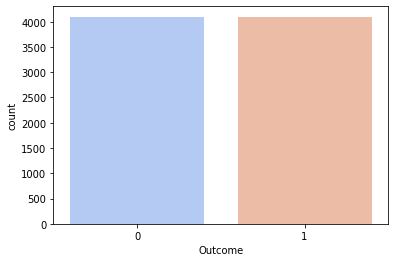

In [20]:
sns.countplot(dataset['Outcome'],label="Count",palette="coolwarm")# visualizing the count of each element  in outcome column

# **Splitting data**

In [130]:
X,y=dataset.loc[:, dataset.columns != 'Outcome'], dataset['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)# splittinh the dataframe into train and test data

In [131]:
    
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(4916, 499)
(3278, 499)
(4916,)
(3278,)


In [132]:
clf = svm.SVC(kernel='poly',degree=2) 
#declaring a variable to svm model


In [134]:
clf.fit(X_train,y_train)#fitting data set into svm model



SVC(degree=2, kernel='poly')

In [135]:
y_pred = clf.predict(X_test)#predicting results using our model
y_pred.shape


(3278,)

In [136]:
#confusion matrix creating for performance measure
cm = np.array(confusion_matrix(y_test, y_pred))
df_cm = pd.DataFrame(cm, columns=np.unique(y_pred), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(df_cm)

Predicted     0     1
Actual               
0          1603    31
1             1  1643


In [137]:
def report(model): #testing the model parameters
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)

SVM Classifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1604
           1       1.00      0.98      0.99      1674

    accuracy                           0.99      3278
   macro avg       0.99      0.99      0.99      3278
weighted avg       0.99      0.99      0.99      3278



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


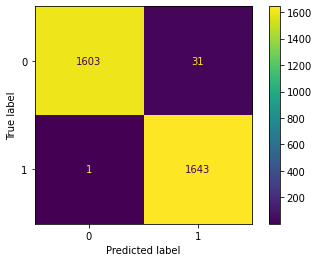

In [138]:
print("SVM Classifier")
report(clf)

In [139]:
#fittting the training set into model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1631
           1       1.00      0.99      1.00      1647

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


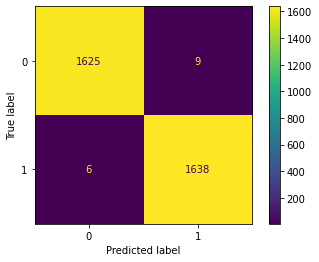

In [140]:
print("Decision Tree Classifier")
report(tree)

In [141]:
#fitting our nodel with training sets
ran=RandomForestClassifier(n_estimators=100)
ran.fit(X_train,y_train)

RandomForestClassifier()

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1635
           1       1.00      1.00      1.00      1643

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


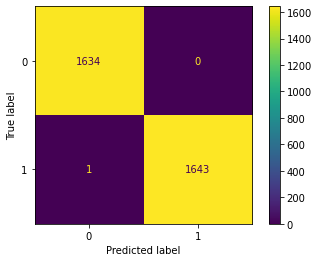

In [142]:
print("Random Forest Classifier")
report(ran)

In [144]:
#now building  adaboostclassifier on training sets and fitting 
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

Adaboost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1634
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


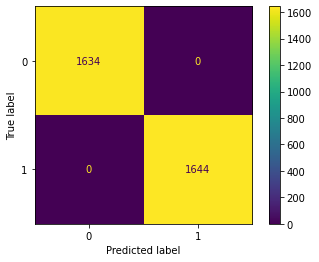

In [145]:
print("Adaboost")
report(classifier)